<style>
.center 
{
  width: auto;
  display: table;
  margin-left: auto;
  margin-right: auto;
}
</style>

# Project: Bandit Learning

---

## Part 1: Classical Bandit Algorithm
We consider a time-slotted bandit system $(t = 1, 2, \ldots)$ with three arms. We denote the arm set as $\{1, 2, 3\}$. Pulling each arm $j$ $(j \in \{1, 2, 3\})$ will obtain a random reward $r_j$, which follows a Bernoulli distribution with mean $\theta _j$, i.e., $\operatorname{Bern}(\theta _j)$. Specifically,
$$
r_j=\begin{cases}
    1, &\text{w.p. } \theta _j, \\
    0, &\text{w.p. } 1-\theta _j,
\end{cases}
$$
where $\theta _j$, $j\in \{1,2,3\}$ are parameters within $(0,1)$.

Now we run this bandit system for $N$ $(N \gg 3)$ time slots. In each time slot $t$, we choose one and only one arm from these three arms, which we denote as $I(t)\in\{1, 2, 3\}$. Then we pull the arm $I(t)$ and obtain a random reward $r_{I(t)}$. Our objective is to find an optimal policy to choose an arm $I(t)$ in each time slot $t$ such that the expectation of the aggregated reward over $N$ time slots is maximized, i.e.,
$$
\max_{I(t),t=1,\ldots,N} \mathbb{E}\left[\sum_{t=1}^N r_{I(t)}\right]
$$
If we know the values of $\theta _j$, $j\in\{1,2,3\}$, this problem is trivial. Since $r_{I(t)}\sim\operatorname{Bern}(\theta_{I(t)})$,
$$
\mathbb{E}\left[\sum_{t=1}^N r_{I(t)}\right]=\sum_{t=1}^N \mathbb{E}[r_{I(t)}]=\sum_{t=1}^N \theta _{I(t)}
$$

Let $I(t)=I^*=\arg\max_{j\in\{1,2,3\}} \theta _j$ for $t=1,2,\ldots,N$, then
$$
\max_{I(t),t=1,\ldots,N} \mathbb{E}\left[\sum_{t=1}^N r_{I(t)}\right]=N\cdot\theta _{I^*}.
$$

However, in reality, we do not know the values of $\theta _j$, $j\in\{1,2,3\}$. We need to estimate the values $\theta _j$, $j\in\{1,2,3\}$ via empirical samples, and then make the decisions in each time slot. Next we introduce three classical bandit algorithms: $\epsilon$-greedy, UCB, and TS, respectively.

#### (1). $\epsilon$-greedy Algorithm $(0\leq\epsilon\leq 1)$

$\text{------------------------------------------------------------------------------------------}$  
**Algorithm 1** $\epsilon$-greedy Algorithm  
$\text{------------------------------------------------------------------------------------------}$  
**Initialize** $\hat{\theta}_j\gets 0$, $\text{count}(j)\gets 0$, $j\in\{1,2,3\}$  
1: **for** $t=1,2,\ldots,N$ **do**  
2:  
$\quad\quad I(t)\gets\begin{cases}
    \arg\max_{j\in\{1,2,3\}} \hat{\theta}_j &\text{w.p. } 1-\epsilon \\
    \text{randomly chosen from}\{1,2,3\} &\text{w.p. } \epsilon
\end{cases}$  
3: $\quad\text{count}(I(t))\gets\text{count}(I(t))+1$  
4: $\quad\hat{\theta}(I(t))\gets\hat{\theta}(I(t))+\frac{1}{\text{count}(I(t))}\left[r_{I(t)}-\hat{\theta}(I(t))\right]$  
5: **end for**  
$\text{------------------------------------------------------------------------------------------}$  

#### (2). UCB (Upper Confidence Bound) Algorithm

$\text{------------------------------------------------------------------------------------------}$  
**Algorithm 2** UCB Algorithm  
$\text{------------------------------------------------------------------------------------------}$  
1: **for** $t=1,2,3$ **do**  
2: $\quad I(t)\gets t$  
3: $\quad\text{count}(I(t))\gets 1$  
4: $\quad\hat{\theta(I(t))}\gets r_{I(t)}$  
5: **end for**  
6: **for** $t=4,\ldots,N$ **do**  
7:  
$\quad\quad I(t)\gets\arg\max_{j\in\{1,2,3\}}\left(\hat{\theta}(j)+c\cdot\sqrt{\frac{2\log(t)}{\text{count}(j)}}\right)$  
8: $\quad\text{count}(I(t))\gets\text{count}(I(t))+1$  
9: $\quad\hat{\theta}(I(t))\gets\hat{\theta}(I(t))+\frac{1}{\text{count}(I(t))}\left[r_{I(t)}-\hat{\theta}(I(t))\right]$  
10: **end for**  
$\text{------------------------------------------------------------------------------------------}$  
**Note:** $c$ is a positive constant with a default value of $1$.

#### (3). TS (Thompson Sampling) Algorithm

Recall that $\theta_j$, $j\in\{1,2,3\}$ are unknown parameters over $(0,1)$. From the Bayesian perspective, we assume their priors are Beta distributions with parameters $(\alpha_j,\beta_j)$.

$\text{------------------------------------------------------------------------------------------}$  
**Algorithm 3** TS Algorithm  
$\text{------------------------------------------------------------------------------------------}$  
**Initialize** Beta parameter $(\alpha_j,\beta_j)$, $j\in\{1,2,3\}$  
1: **for** $t=1,2,\ldots,N$ **do**  
2: $\quad$ $\#\,\, Sample\,\, model$  
3: $\quad$ **for** $j\in\{1,2,3\}$ **do**  
4: $\quad\quad$ Sample $\hat{\theta}(j)\sim\operatorname{Beta}(\alpha_j,\beta_j)$  
5: $\quad$ **end for**  
6: $\quad\#\,\, Select\,\, and\,\, pull\,\, the\,\, arm$  
$\quad\quad I(t)\gets\arg\max_{j\in\{1,2,3\}}\hat{\theta}(j)$  
7: $\quad\#\,\, Update\,\, the\,\, distribution$  
$\quad\quad\alpha_{I(t)}\gets\alpha_{I(t)}+r_{I(t)}$  
$\quad\quad\beta_{I(t)}\gets\beta_{I(t)}+1-r_{I(t)}$  
8: **end for**  
$\text{------------------------------------------------------------------------------------------}$  

---

>### Problem 1
>Now suppose we obtain the parameters of the Bernoulli distributions from an oracle, which are shown in the following table. Choose $N = 5000$ and compute the theoretically maximized expectation of aggregate rewards over $N$ time slots. We call it the oracle value. Note that these parameters $\theta_j$, $j\in\{1,2,3\}$ and oracle values are unknown to all bandit algorithms.  
<div class="center">

|Arm $j$|1|2|3|
|:-:|-|-|-|
|$\theta_j$|0.7|0.5|0.4|

</div>

### Answer of Problem 1

Since we have already known the value of $\theta$ of each arm, so we just need to choose the arm with the max value of $\theta$ each time to get maximum profit, which is $\theta_1=0.7$.

Since $r_{I(t)} \sim \text{Bern}(\theta_{I(t)})$, we get $E(r_{I(t)}) = \theta_{I(t)}=\theta_1=0.7$

And the maximum expected value is
$$
\begin{aligned}
    \max_{I(t),t=1,2,\cdots,N} E\left[\sum_{t=1}^Nr_{I(t)}\right]&=&&\max_{I(t),t=1,2,\cdots,N} \sum_{t=1}^NE\left[r_{I(t)}\right] \\
    &=&&N\cdot\theta_{I(t)} \\
    &=&& 5000\times 0.7 = 3500
\end{aligned}
$$

So the theoretically maximized expectation of aggregate rewards over time slots is 3500.

---

>### Problem 2
>Implement classical bandit algorithms with following settings:  
>$\text{-}$ $N=5000$  
>$\text{-}$ $\epsilon$-greedy with $\epsilon\in\{0.1,0.5,0.9\}$.  
>$\text{-}$ UCB with $c\in\{1,5,10\}$.  
>$\text{-}$ TS with $\{(\alpha_1,\beta_1)=(1,1),(\alpha_2,\beta_2)=(1,1),(\alpha_3,\beta_3)=(1,1)\}$ and $\{(\alpha_1,\beta_1)=(601,401),(\alpha_2,\beta_2)=(401,601),(\alpha_3,\beta_3)=(2,3)\}$

### Answer of Problem 2
Settings:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#the oracle value
theta_oracle = np.array([0.7, 0.5, 0.4])

#the settings
num_arm = 3   #number of arms
n = 5000   #number of trials in each simulation
epsilon = np.array([0.1,0.5,0.9])
c = np.array([1,5,10])
alpha = np.array([[1,1,1],[601,401,2]])
beta = np.array([[1,1,1],[401,601,3]])

Implementation of the three classical bandit algorithms:

In [2]:
#the epsilon-greedy algorithm returning the total reward after n trials
def epsilon_greedy(num_arm, n, epsilon):
    #initialize the variables
    count = np.zeros(num_arm)
    theta_hat = np.zeros(num_arm)
    reward = 0
    
    for _ in range(n):
        if np.random.random() < epsilon:   #the exploration 
            arm = np.random.randint(num_arm)
        else:   #the exploitation
            arm = np.argmax(theta_hat)
        #update the variables
        count[arm] += 1
        r = np.random.binomial(1, theta_oracle[arm])   #the reward in this trial
        theta_hat[arm] += (1/count[arm]) * (r - theta_hat[arm])
        reward += r
        
    return reward, theta_hat

In [3]:
#the UCB (Upper Confidence Bound) algorithm returning the total reward after n trials
def UCB(num_arm, n, c):
    #initialize the variables
    count = np.zeros(num_arm)
    theta_hat = np.zeros(num_arm)
    reward = 0
    
    #the exploration
    for t in range(num_arm):
        arm = t
        count[arm] += 1
        r = np.random.binomial(1, theta_oracle[arm])   #the reward in this trial
        #update the variables
        theta_hat[arm] = r
        reward += r

    #the exploitation
    for t in range(num_arm + 1, n + 1):
        arm = np.argmax(theta_hat + c * np.sqrt(2*np.log(t)/count))
        #update the variables
        count[arm] += 1
        r = np.random.binomial(1, theta_oracle[arm])   #the reward in this trial 
        theta_hat[arm] += (1/count[arm]) * (r - theta_hat[arm])
        reward += r
        
    return reward, theta_hat 

In [4]:
#the TS (Thompson sampling) algorithm returning the total reward after n trials
def TS(num_arm, n, alpha, beta):
    #copy the alpha and beta    
    alpha_post = np.zeros(num_arm)
    beta_post = np.zeros(num_arm)
    for arm in range(num_arm):
        alpha_post[arm] = alpha[arm]
        beta_post[arm] = beta[arm]
    
    #initialize the variables
    theta_hat = np.zeros(num_arm)
    reward = 0
    
    for _ in range(n):
        for arm in range(num_arm):
            theta_hat[arm] = np.random.beta(alpha_post[arm], beta_post[arm])
        arm = np.argmax(theta_hat)
        #update the variables
        r = np.random.binomial(1, theta_oracle[arm])   #the reward in this trial
        alpha_post[arm] += r
        beta_post[arm] += 1 - r
        reward += r
        
    return reward, alpha_post, beta_post

Implementation of $\epsilon$-greedy algorithm with the given $\epsilon$:

In [5]:
rewards_eg = np.zeros(len(epsilon))
theta_hats = np.zeros((len(epsilon), num_arm))
for i in range(len(epsilon)):
    rewards_eg[i], theta_hats[i] = epsilon_greedy(num_arm, n, epsilon[i])
    print("epsilon = ", epsilon[i], ", reward = ", int(rewards_eg[i]), ", theta_hat = ", np.around(theta_hats[i], 3))

epsilon =  0.1 , reward =  3428 , theta_hat =  [0.699 0.527 0.434]
epsilon =  0.5 , reward =  3014 , theta_hat =  [0.689 0.489 0.38 ]
epsilon =  0.9 , reward =  2839 , theta_hat =  [0.714 0.516 0.424]


Implementation of UCB algorithm with the given $c$:

In [6]:
rewards_UCB = np.zeros(len(c))
theta_hats = np.zeros((len(c), num_arm))
for i in range(len(c)):
    rewards_UCB[i], theta_hats[i] = UCB(num_arm, n, c[i])
    print("c = ", c[i], ", reward = ", int(rewards_UCB[i]), ", theta_hat = ", np.around(theta_hats[i], 3))

c =  1 , reward =  3414 , theta_hat =  [0.7   0.432 0.406]
c =  5 , reward =  2996 , theta_hat =  [0.698 0.512 0.442]
c =  10 , reward =  2840 , theta_hat =  [0.692 0.513 0.422]


Implementation of TS algorithm with the given $\alpha$ and $\beta$:

In [7]:
rewards_TS = np.zeros(len(alpha))
alpha_posts = np.zeros((len(alpha), num_arm))
beta_posts = np.zeros((len(beta), num_arm))
for i in range(len(alpha)):
    rewards_TS[i], alpha_posts[i], beta_posts[i] = TS(num_arm, n, alpha[i], beta[i])
    print("alpha = ", alpha[i], ", beta = ", beta[i])
    print("alpha_post = ", alpha_posts[i].astype(int), ", beta_post = ", beta_posts[i].astype(int))
    print("reward = ", int(rewards_TS[i]), ", theta_hat = ", np.around(alpha_posts[i] / (alpha_posts[i] + beta_posts[i]), 3))
    print()

alpha =  [1 1 1] , beta =  [1 1 1]
alpha_post =  [3426   31   10] , beta_post =  [1491   30   18]
reward =  3464 , theta_hat =  [0.697 0.508 0.357]

alpha =  [601 401   2] , beta =  [401 601   3]
alpha_post =  [4103  401   21] , beta_post =  [1856  601   27]
reward =  3521 , theta_hat =  [0.689 0.4   0.438]



---

>### Problem 3
>Each experiment lasts for $N = 5000$ time slots, and we run each experiment $200$ trials. Results are averaged over these $200$ independent trials.

### Answer of Problem 3
Settings:

In [8]:
num_repeat = 200   #number of reputations

Implementation of $\epsilon$-greedy algorithm with repeat:

In [9]:
rewards_average_eg = np.zeros(len(epsilon))
theta_hats_average_eg = np.zeros((len(epsilon), num_arm))
for i in range(len(epsilon)):
    for j in range(num_repeat):
        reward, theta_hat = epsilon_greedy(num_arm, n, epsilon[i])
        rewards_average_eg[i] = (j * rewards_average_eg[i] + reward) / (j + 1)
        theta_hats_average_eg[i] = (j * theta_hats_average_eg[i] + theta_hat) / (j + 1)
    print("epsilon = ", epsilon[i], ", reward = ", format(rewards_average_eg[i], '.3f'), ", theta_hat = ", np.around(theta_hats_average_eg[i], 3)) 

epsilon =  0.1 , reward =  3416.040 , theta_hat =  [0.7   0.504 0.399]
epsilon =  0.5 , reward =  3078.255 , theta_hat =  [0.7   0.498 0.399]
epsilon =  0.9 , reward =  2753.380 , theta_hat =  [0.7   0.501 0.401]


Implementation of UCB algorithm with repeat:

In [10]:
rewards_average_UCB = np.zeros(len(c))
theta_hats_average_UCB = np.zeros((len(c), num_arm))
for i in range(len(c)):
    for j in range(num_repeat):
        reward, theta_hat = UCB(num_arm, n, c[i])
        rewards_average_UCB[i] = (j * rewards_average_UCB[i] + reward) / (j + 1)
        theta_hats_average_UCB[i] = (j * theta_hats_average_UCB[i] + theta_hat) / (j + 1)
    print("c = ", c[i], ", reward = ", format(rewards_average_UCB[i], '.3f'), ", theta_hat = ", np.around(theta_hats_average_UCB[i], 3)) 

c =  1 , reward =  3410.360 , theta_hat =  [0.7   0.492 0.391]
c =  5 , reward =  2981.745 , theta_hat =  [0.7   0.498 0.401]
c =  10 , reward =  2829.730 , theta_hat =  [0.701 0.499 0.4  ]


Implementation of TS algorithm with repeat:

In [11]:
rewards_average_TS = np.zeros(len(alpha))
alpha_posts_average_TS = np.zeros((len(alpha), num_arm))
beta_posts_average_TS = np.zeros((len(beta), num_arm))
for i in range(len(alpha)):
    for j in range(num_repeat):
        reward, alpha_post, beta_post = TS(num_arm, n, alpha[i], beta[i])
        rewards_average_TS[i] = (j * rewards_average_TS[i] + reward) / (j + 1)
        alpha_posts_average_TS[i] = (j * alpha_posts_average_TS[i] + alpha_post) / (j + 1)
        beta_posts_average_TS[i] = (j * beta_posts_average_TS[i] + beta_post) / (j + 1)
    print("alpha = ", alpha[i], ", beta = ", beta[i])
    print("alpha_post = ", alpha_posts_average_TS[i].astype(int), ", beta_post = ", beta_posts_average_TS[i].astype(int))
    print("reward = ", format(rewards_average_TS[i], '.3f'), ", theta_hat = ", np.around(alpha_posts[i] / (alpha_posts[i] + beta_posts[i]), 3))
    print()

alpha =  [1 1 1] , beta =  [1 1 1]
alpha_post =  [3444   27   11] , beta_post =  [1478   27   16]
reward =  3480.270 , theta_hat =  [0.697 0.508 0.357]

alpha =  [601 401   2] , beta =  [401 601   3]
alpha_post =  [4077  401   14] , beta_post =  [1894  601   20]
reward =  3488.455 , theta_hat =  [0.689 0.4   0.438]



---
### Further Exploration on the three classical algorithms
The basic idea of this part is to find optimal parameters for each algorithm. First, we consider the parameters as a constant and look for the best-behave constant. And we will also look into the idea that the parameters may be a function of the time and look for the best-behave approximation function of time for each parameters.

#### $\epsilon$-greedy algorithm modified
Let's first assume that the $\epsilon$ is a constant:

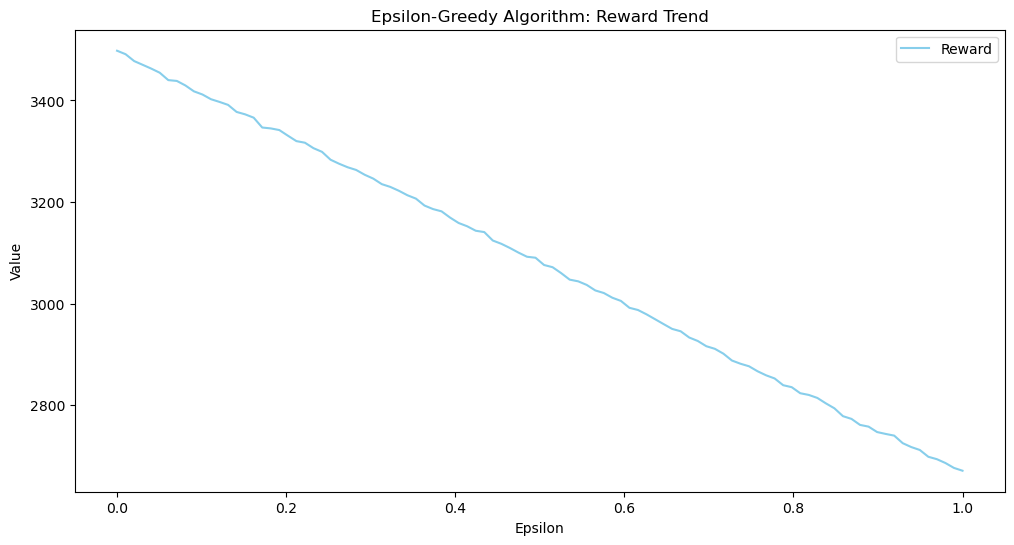

In [12]:
epsilon_values = np.linspace(0, 1, 100)
reward_values = np.zeros(len(epsilon_values))
for i in range(len(epsilon_values)):
    for j in range(num_repeat):
        reward, _ = epsilon_greedy(num_arm, n, epsilon_values[i])
        reward_values[i] = (j * reward_values[i] + reward) / (j + 1)
        
    
plt.figure(figsize=(12, 6))
plt.plot(epsilon_values, reward_values, label='Reward', color='skyblue')
plt.xlabel('Epsilon')
plt.ylabel('Value')
plt.title('Epsilon-Greedy Algorithm: Reward Trend')
plt.legend()
plt.show()

As the line chart depicted, the best $\epsilon$ is very small and the algorithm behaves really bad when $\epsilon$ is too large.  

Then let's further explore the situation where $\epsilon$ is a function of time. The alternative functions are as follows:  
1. inverse: $\epsilon(t)=\frac{1}{t}$
2. linear: $\epsilon(t)=1-\frac{t-1}{N-1}$
3. exponential: $\epsilon(t)=0.98^t$

In [13]:
def epsilon_inverse(t):
    return 1 / t

def epsilon_linear(t):
    return 1 - (t - 1) / (n - 1)

def epsilon_expo(t):
    return 0.98**t


def epsilon_greedy_modified(num_arm, n, epsilon):
    #initialize the variables
    count = np.zeros(num_arm)
    theta_hat = np.zeros(num_arm)
    reward = 0
    
    for t in range(n):
        if np.random.random() < epsilon(t + 1):   #the exploration 
            arm = np.random.randint(num_arm)
        else:   #the exploitation
            arm = np.argmax(theta_hat)
        #update the variables
        count[arm] += 1
        r = np.random.binomial(1, theta_oracle[arm])   #the reward in this trial
        theta_hat[arm] += (1/count[arm]) * (r - theta_hat[arm])
        reward += r
        
    return reward, theta_hat

rewards_eg_modified = np.zeros(3)
for j in range(num_repeat):
    reward, _ = epsilon_greedy_modified(num_arm, n, epsilon_inverse)
    rewards_eg_modified[0] = (j * rewards_eg_modified[0] + reward) / (j + 1)
for j in range(num_repeat):
    reward, _ = epsilon_greedy_modified(num_arm, n, epsilon_linear)
    rewards_eg_modified[1] = (j * rewards_eg_modified[0] + reward) / (j + 1)
for j in range(num_repeat):
    reward, _ = epsilon_greedy_modified(num_arm, n, epsilon_expo)
    rewards_eg_modified[2] = (j * rewards_eg_modified[0] + reward) / (j + 1)
    


---

>### Problem 4
>Compute the gaps between the algorithm outputs (aggregated rewards over $N$ time slots) and the oracle value. Compare the numerical results of $\epsilon$-greedy, UCB, and TS. Which one is the best? Then discuss the impacts of $\epsilon$, $c$, and $\alpha_j$, $\beta_j$, respectively.

### Answer of Problem 4
The gaps between the algorithm outputs and the oracle value and the numerical results of the algorithms are as follows:

Text(0.5, 1.0, 'TS Reward Gaps')

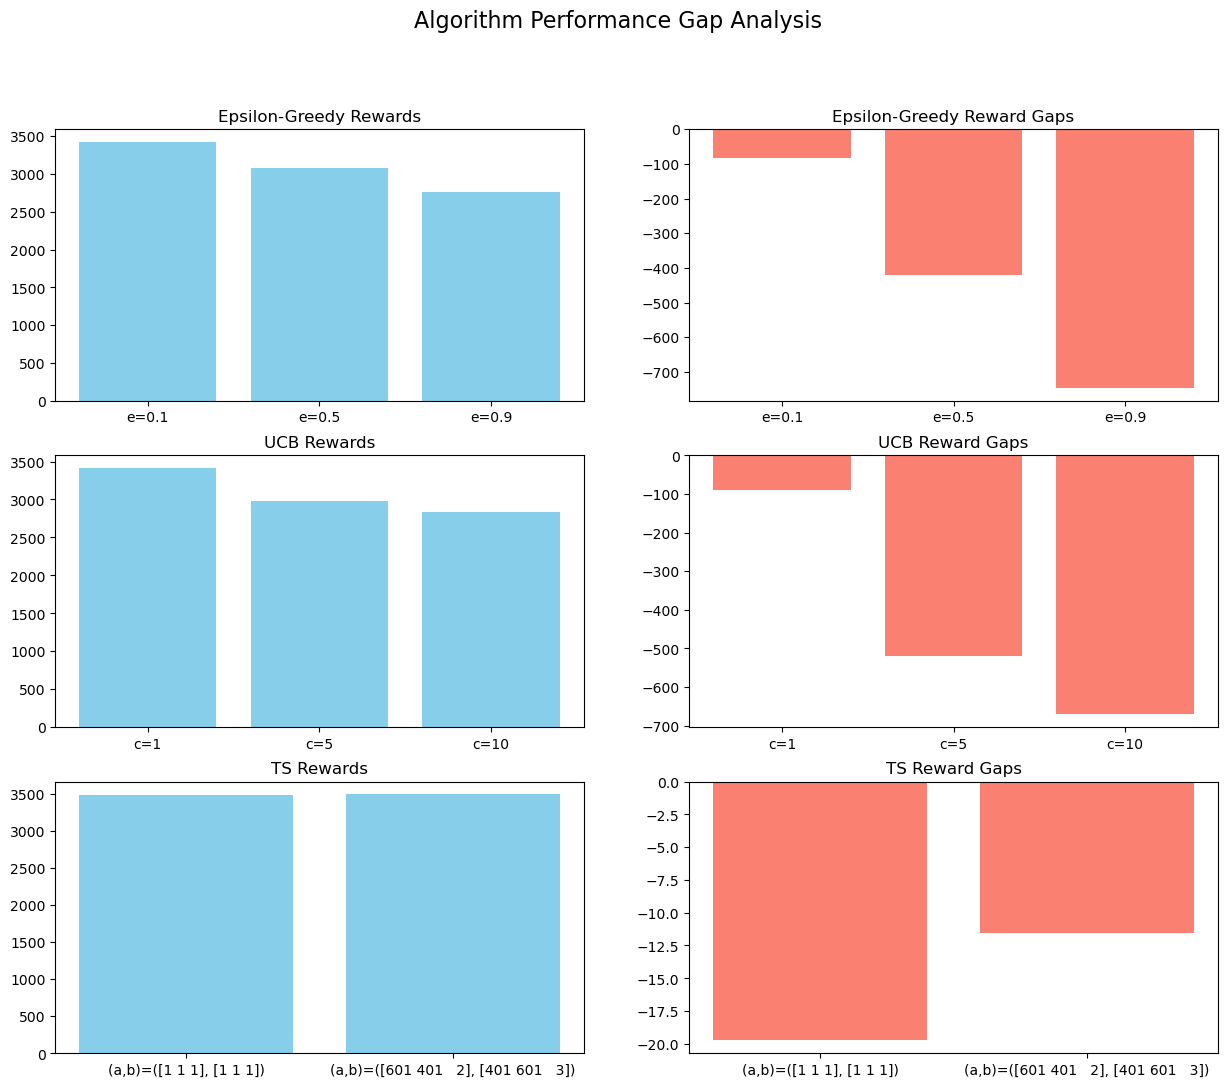

In [14]:
#oracle values
reward_oracle = n * max(theta_oracle)

#compute the gaps
epsilon_greedy_gaps_dict = {}
for i in range(len(epsilon)):
    epsilon_greedy_gaps_dict["e="+str(epsilon[i])] = rewards_average_eg[i] - reward_oracle
    
UCB_gaps_dict = {}
for i in range(len(c)):
    UCB_gaps_dict["c="+str(c[i])] = rewards_average_UCB[i] - reward_oracle
    
TS_gaps_dict = {}
for i in range(len(alpha)):
    TS_gaps_dict["(a,b)=("+str(alpha[i])+", "+str(beta[i])+")"] = rewards_average_TS[i] - reward_oracle
    
# Plotting
fig, ax = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle("Algorithm Performance Gap Analysis", fontsize=16)

# Epsilon-Greedy Plots
ax[0, 0].bar(list(epsilon_greedy_gaps_dict.keys()), rewards_average_eg, color='skyblue')
ax[0, 0].set_title("Epsilon-Greedy Rewards")
ax[0, 1].bar(list(epsilon_greedy_gaps_dict.keys()), list(epsilon_greedy_gaps_dict.values()), color='salmon')
ax[0, 1].set_title("Epsilon-Greedy Reward Gaps")

# UCB Plots
ax[1, 0].bar(list(UCB_gaps_dict.keys()), rewards_average_UCB, color='skyblue')
ax[1, 0].set_title("UCB Rewards")
ax[1, 1].bar(list(UCB_gaps_dict.keys()), list(UCB_gaps_dict.values()), color='salmon')
ax[1, 1].set_title("UCB Reward Gaps")

# TS Plots
ax[2, 0].bar(list(TS_gaps_dict.keys()), rewards_average_TS, color='skyblue')
ax[2, 0].set_title("TS Rewards")
ax[2, 1].bar(list(TS_gaps_dict.keys()), list(TS_gaps_dict.values()), color='salmon')
ax[2, 1].set_title("TS Reward Gaps")

As the bar charts depicted, the Thompson Sampling Algorithm (with $(a,b)=([601,401,2],[401,601,3])$) follows with the smallest gap and behaves best. Meanwhile, the other two behave worse with any parameters.

Discussion on the impacts of $\epsilon$, $c$, $\alpha_j$ and $\beta_j$ respectively.
1. the epsilon-greedy algorithm:  
In the epsilon-greedy algorithm, the parameter $\epsilon$ resembles the degree we explore or exploit, and the probability we explore is $\epsilon$ while the probability we exploit is $1-\epsilon$. if $\epsilon$ were small, it means that we are more likely to explore other arms instead of the best arm, while if $\epsilon$ become large, then we are more likely to exploit our best arm.  
From the results above, the reward reaches the highest with $\epsilon=0.1$, which is a small number and it indicated us that decrease the value may result in a high reward to some degree. And from our further exploration, the reward reaches the highest when $\epsilon$ follows an exponential distribution with a base less than one. From my perspective, it's known that the exponential function will first decrease at a respectively lower speed and then decrease at a faster speed, which indicate that at the beginning we just prefer to choose the strategy of exploration and gradually after we have a preliminary estimation of which arm is relatively the best at the moment, we are expected to spend more time on the best arm, which helps to explain why the exponential function make the best performance.

1. the UCB algorithm:  
In the UCB algorithm, the parameter c denotes the degree of exploration, and the higher the c is, the higher probability we get for exploration. From the calculation above, the rewaed reaches the highest with c=1, which is a small number and it indicated us that in a certain range, decrease the calue of c may contribute to a high reward.  
And from our further exploration, the reward reaches the highest when c follows an exponential distribution with a base less than one, like the $\epsilon$ greedy algorithm , and we can understand this that at first, we are supposed to put more time on the exploration stage, and as time goes by, after we have a roughly estimate of whih one, we are more likely to choose the best arm we have learned, our idea is consistent with the growth of the exponential funcion, which is also decrease slowly at fist then decrease sharply later. 

1. the Thompson Sampling algorithm:  
In the Thompson Sampling algorithm, we have two parameter $\alpha$ and $\beta$ related to $\hat{\theta_j}$, which denote the prior belief of the distribution of the reward then we update the parameters according to the reward we get.  
And we can learn that if $\alpha_j$ and $\beta_j$ were small initially, we are more likely to have less exploration since the given information is insufficient, and if $\alpha_j$ and $\beta_j$ were big, then we are more likely to explore instead of exploit, and we can find the process is like a kind of bayes experiment, where we make our next step based on the privious information we get, which means that the value of $\alpha_j$ and $\beta_j$ contribute to the later performance.

---

>### Problem 5
>Give your understanding of the exploration-exploitation trade-off in bandit algorithms.

### Answer of Problem 5
The challenge lies in finding a balance between exploring and exploiting. Exploration means collecting more data from past decisions and feedback, while exploitation means using that information for the best outcomes.

The difficulty arises from not knowing when to transition from exploring to exploiting. Constantly exploring may mean missing better rewards, while constant exploiting may lead to wrong choices. A simple approach, like exploring when uncertain and exploiting when confident, isn't clear enough. We're unsure about the frequency of exploration and the transition to exploitation.  
From our experiments, we've observed a relationship between rewards and regrets in these algorithms. As rewards increase, regrets decrease, and vice versa.

Epsilon-Greedy Approach  
This method involves a parameter controlling exploration levels. We set probabilities for exploration and exploitation at each step. Experimentation reveals that initiating with more exploration and gradually shifting to more exploitation leads to better results. Adjusting this parameter over time, with a decrease, delivers optimal performance.

UCB Approach  
This method uses certain boundaries and time-based factors to manage exploration and exploitation. It utilizes a parameter to balance these actions. It guides arm selection, focusing on both exploitation and exploration. As the number of turns increases, the emphasis on exploration decreases. Experiments highlight that a smaller value results in better performance. Adjusting the parameter based on turn count, favoring more exploration initially and more exploitation later, enhances overall performance.

Thompson Sampling Approach  
Similar to Bayesian Inference, this method utilizes specific distributions to control exploration and exploitation. It maintains a distribution for each arm and updates it based on feedback. More data improves performance, establishing a good balance between exploration and exploitation. Among these methods, Thompson Sampling consistently performs better, even with minor parameter changes.

In Conclusion, each method has unique strengths in balancing exploration and exploitation. Choosing the right one depends on the situation. Adjusting parameters is crucial for optimal results. Striking the right balance between exploration and exploitation is crucial in bandit algorithms.

---

>### Problem 6
>We implicitly assume the reward distribution of these three arms are independent. How about the dependent case? Can you design an algorithm to exploit such information to obtain a better result?

### Answer of Problem 6
This is a complex problem and the point is how the arms are related. The concept behind our algorithm is the assumption that the first two arms are not independent regarding reward distribution, while the third arm's reward distribution is independent of the first two. Specifically, we posit that the success of arm 1(2) is equal to the same of arm 2(1).

Our approach suppose that arms one and two share an identical Beta distribution, while arm three operates on a distinct Beta distribution. Regardless of whether arms one or two succeed or fail upon selection, their distributions are updated in tandem. Choosing arm one entails updating the Beta distributions of both arms one and two, similarly for the selection of arm two. In contrast, selecting arm three leads to an exclusive update of its own Beta distribution, ensuring that arms one and two maintain synchronized distributions. This method can enhances the convergence speed by maximizing the information gleaned from arms one and two. It also streamlines the decision-making process, guiding the algorithm to more optimal choices.

Should arms one and two be determined as the less favorable options, the algorithm is designed to pivot towards arm three more rapidly. Conversely, if arms one and two prove to be more advantageous, the algorithm will gravitate towards them with increased speed. Ultimately, this strategy promotes a more efficient exploration mode, optimizing the trade-off between exploration and exploitation, thereby increasing the likelihood of securing superior rewards.

Let's start with the $\epsilon$-greedy algorithm:

In [15]:
#the epsilon-greedy algorithm with dependent arms
def epsilon_greedy_dependent(num_arm, n, epsilon):
    #initialize the variables
    count = np.zeros(num_arm)
    theta_hat = np.zeros(num_arm)
    reward = 0
    
    for _ in range(n):
        if np.random.random() < epsilon:   #the exploration 
            arm = np.random.randint(num_arm)
        else:   #the exploitation
            arm = np.argmax(theta_hat)
        #update the variables
        r = np.random.binomial(1, theta_oracle[arm])   #the reward in this trial
        if (arm != 2):
            count[0] += 1
            count[1] += 1
            theta_hat[0] += (1/count[0]) * (r - theta_hat[0])
            theta_hat[1] += (1/count[1]) * (r - theta_hat[1])
        else:
            count[2] += 1
            theta_hat[2] += (1/count[2]) * (r - theta_hat[2])
        reward += r
        
    return reward

rewards_dependent_eg = np.zeros(len(epsilon))
for i in range(len(epsilon)):
    rewards_dependent_eg[i] = epsilon_greedy_dependent(num_arm, n, epsilon[i])
    print("epsilon = ", epsilon[i], ", reward = ", int(rewards_dependent_eg[i]))

epsilon =  0.1 , reward =  3392
epsilon =  0.5 , reward =  3078
epsilon =  0.9 , reward =  2813


The UCB algorithm with dependent arms is as follows:

In [16]:
#the UCB (Upper Confidence Bound) algorithm with dependent arms
def UCB_dependent(num_arm, n, c):
    #initialize the variables
    count = np.zeros(num_arm)
    theta_hat = np.zeros(num_arm)
    reward = 0
    
    #the exploration
    for t in range(num_arm):
        arm = t
        count[arm] += 1
        r = np.random.binomial(1, theta_oracle[arm])   #the reward in this trial
        #update the variables
        theta_hat[arm] = r
        reward += r

    #the exploitation
    for t in range(num_arm + 1, n + 1):
        arm = np.argmax(theta_hat + c * np.sqrt(2*np.log(t)/count))
        #update the variables
        r = np.random.binomial(1, theta_oracle[arm])   #the reward in this trial 
        if (arm != 2):
            count[0] += 1
            count[1] += 1
            theta_hat[0] += (1/count[0]) * (r - theta_hat[0])
            theta_hat[1] += (1/count[1]) * (r - theta_hat[1])
        else:
            count[2] += 1
            theta_hat[2] += (1/count[2]) * (r - theta_hat[2])
        reward += r
        
    return reward

rewards_dependent_UCB = np.zeros(len(c))
for i in range(len(epsilon)):
    rewards_dependent_UCB[i] = UCB_dependent(num_arm, n, c[i])
    print("c = ", c[i], ", reward = ", int(rewards_dependent_UCB[i]))

c =  1 , reward =  3423
c =  5 , reward =  3125
c =  10 , reward =  3006


The TS algorithm arms is as follows:

In [17]:
#the TS (Thompson sampling) algorithm with dependent arms
def TS_dependent(num_arm, n, alpha, beta):
    #copy the alpha and beta    
    alpha_post = np.zeros(num_arm)
    beta_post = np.zeros(num_arm)
    for arm in range(num_arm):
        alpha_post[arm] = alpha[arm]
        beta_post[arm] = beta[arm]
    
    #initialize the variables
    theta_hat = np.zeros(num_arm)
    reward = 0
    
    for _ in range(n):
        for arm in range(num_arm):
            theta_hat[arm] = np.random.beta(alpha_post[arm], beta_post[arm])
        arm = np.argmax(theta_hat)
        #update the variables
        r = np.random.binomial(1, theta_oracle[arm])   #the reward in this trial
        if (arm != 2):
            alpha_post[0] += r
            beta_post[0] += 1 - r
            alpha_post[1] += r
            beta_post[1] += 1 - r
        else:
            alpha_post[2] += r
            beta_post[2] += 1 - r
        reward += r
        
    return reward

rewards_dependent_TS = np.zeros(len(alpha))
for i in range(len(alpha)):
    rewards_dependent_TS[i] = TS_dependent(num_arm, n, alpha[i], beta[i])
    print("alpha = ", alpha[i], ", beta = ", beta[i])
    print("reward = ", format(rewards_dependent_TS[i], '.3f'))
    print()

alpha =  [1 1 1] , beta =  [1 1 1]
reward =  3008.000

alpha =  [601 401   2] , beta =  [401 601   3]
reward =  3408.000

